# Gépi Tanulás Klasszifikációs Feladatok Összefoglalója

Ez a notebook összefoglalja a két klasszifikációs feladatot:
1. Osztályozás szintetikus adatokon.
2. Osztályozás a Wine adathalmazon.


## Szükséges Könyvtárak Importálása

Először importáljuk az összes szükséges könyvtárat mindkét feladathoz.

In [19]:
import numpy as np
import pandas as pd
import time
import os
import warnings
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Feladat: Osztályozás Szintetikus Adatokon

## 1.1 Adatgenerálás

Létrehozunk egy mesterséges adathalmazt `make_blobs` segítségével.

In [20]:
X_part1, y_part1 = make_blobs(n_samples=241, n_features=11, centers=4, cluster_std=0.6, random_state=3650653441)

## 1.2 Adat Vizualizációja (PCA)

Főkomponens Analízist (PCA) használunk a dimenziócsökkentésre 2D ábrázoláshoz, `StandardScaler` előzetes alkalmazásával.

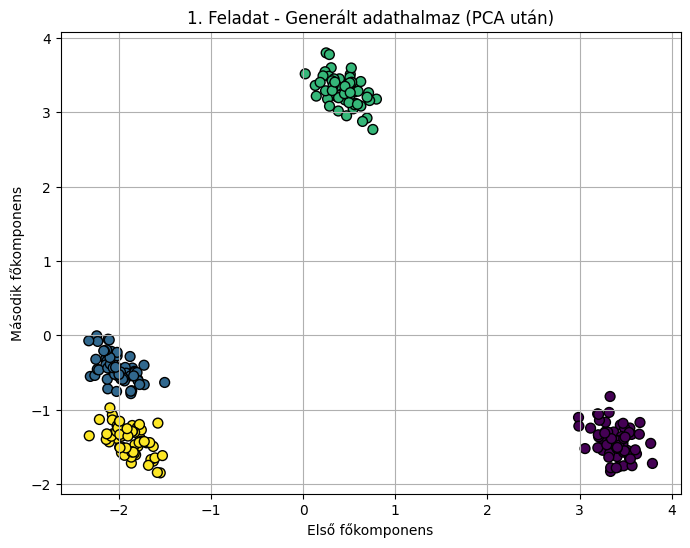

In [21]:
scaler_pca_part1 = StandardScaler()
X_scaled_part1 = scaler_pca_part1.fit_transform(X_part1)
pca_part1 = PCA(n_components=2, random_state=3650653441)
X_pca_part1 = pca_part1.fit_transform(X_scaled_part1)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_part1[:, 0], X_pca_part1[:, 1], c=y_part1, cmap="viridis", edgecolor="k", s=50)
plt.title('1. Feladat - Generált adathalmaz (PCA után)')
plt.xlabel("Első főkomponens")
plt.ylabel("Második főkomponens")
plt.grid(True)
plt.show()

## 1.3 Adat Felosztása és Skálázása

Az eredeti adatokat tanító és teszt halmazra osztjuk (`train_test_split`), majd `StandardScaler`-rel skálázzuk.

In [22]:
X_train_part1, X_test_part1, y_train_part1, y_test_part1 = train_test_split(
    X_part1, y_part1, test_size=0.3, random_state=3650653441, stratify=y_part1
)
scaler_model_part1 = StandardScaler()
X_train_scaled_part1 = scaler_model_part1.fit_transform(X_train_part1)
X_test_scaled_part1 = scaler_model_part1.transform(X_test_part1)

## 1.4 Modellek Tanítása és Kiértékelése

Definiáljuk, tanítjuk (`fit`) és kiértékeljük (`predict`, `accuracy_score`, `classification_report`, `confusion_matrix`) a Naiv Bayes, SVM és Logisztikus Regresszió modelleket.


Naive Bayes - Teszt pontosság: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



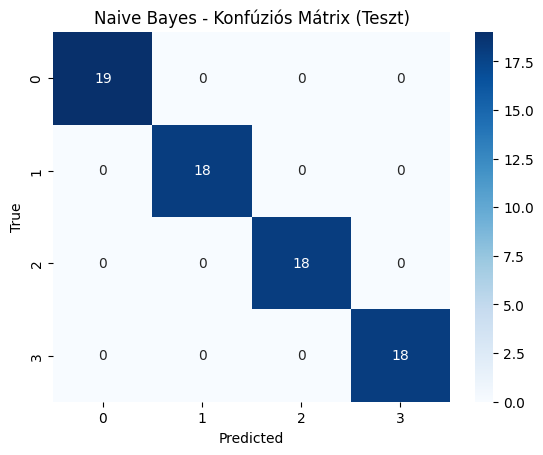


Support Vector Machine - Teszt pontosság: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



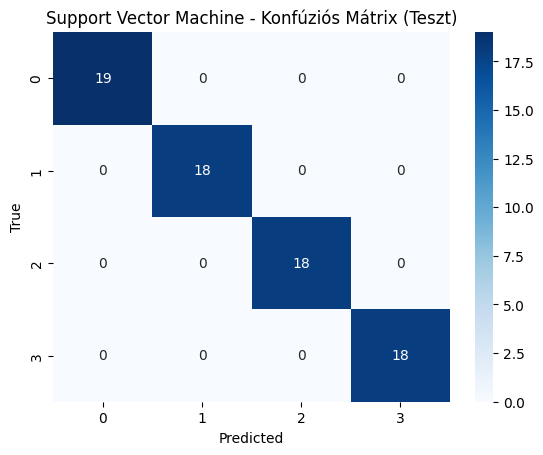


Logistic Regression - Teszt pontosság: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



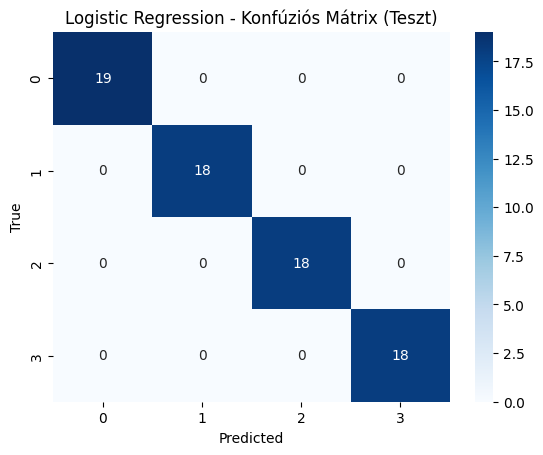

In [23]:
models_part1 = {
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(random_state=3650653441, probability=True),
    "Logistic Regression": LogisticRegression(random_state=3650653441, max_iter=1000)
}
results_part1 = {}
for name, model in models_part1.items():
    start_time = time.time()
    model.fit(X_train_scaled_part1, y_train_part1)
    end_time = time.time()
    y_pred_train_part1 = model.predict(X_train_scaled_part1)
    y_pred_test_part1 = model.predict(X_test_scaled_part1)
    accuracy_train_part1 = accuracy_score(y_train_part1, y_pred_train_part1)
    accuracy_test_part1 = accuracy_score(y_test_part1, y_pred_test_part1)
    report_test_part1 = classification_report(y_test_part1, y_pred_test_part1)
    cm_test_part1 = confusion_matrix(y_test_part1, y_pred_test_part1)
    results_part1[name] = {
        "training_time": end_time - start_time,
        "train_acc": accuracy_train_part1,
        "test_acc": accuracy_test_part1
    }
    print(f"\n{name} - Teszt pontosság: {accuracy_test_part1:.3f}")
    print(report_test_part1)
    sns.heatmap(cm_test_part1, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Konfúziós Mátrix (Teszt)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

## 1.5 Eredmények Összefoglalása

Összefoglaljuk a modellek tanítási idejét és pontosságát szövegesen.

In [24]:
print("\n--- 1. Feladat: Összehasonlítás ---")
print(f"{'Modell':<25} {'Tanítási idő (s)':<20} {'Train acc':<12} {'Test acc':<12}")
for name, res in results_part1.items():
    print(f"{name:<25} {res['training_time']:<20.4f} {res['train_acc']:<12.3f} {res['test_acc']:<12.3f}")


--- 1. Feladat: Összehasonlítás ---
Modell                    Tanítási idő (s)     Train acc    Test acc    
Naive Bayes               0.0007               1.000        1.000       
Support Vector Machine    0.0022               1.000        1.000       
Logistic Regression       0.0026               1.000        1.000       


## 1.6 SVM Hiperparaméter-Hangolás ('C')

`GridSearchCV` segítségével megkeressük az SVM modell optimális `C` paraméterét.

In [25]:
param_grid_svm_part1 = {'C': [0.01, 0.1, 1, 10, 100]}
svm_cv_part1 = SVC(random_state=3650653441, probability=True)
grid_search_part1 = GridSearchCV(svm_cv_part1, param_grid_svm_part1, cv=5, scoring='accuracy')
grid_search_part1.fit(X_train_scaled_part1, y_train_part1)
best_c = grid_search_part1.best_params_['C']
best_score = grid_search_part1.best_score_
print(f"Legjobb 'C': {best_c}, Legjobb CV pontosság: {best_score:.4f}")
best_svm_part1 = grid_search_part1.best_estimator_
accuracy_svm_best_test_part1 = best_svm_part1.score(X_test_scaled_part1, y_test_part1)
print(f"Legjobb SVM teszt pontosság: {accuracy_svm_best_test_part1:.4f}")

Legjobb 'C': 0.1, Legjobb CV pontosság: 1.0000
Legjobb SVM teszt pontosság: 1.0000


## 1.7 Logisztikus Regresszió Iterációk Hatása

Megvizsgáljuk, hogyan befolyásolja a `max_iter` paraméter a Logisztikus Regresszió pontosságát.

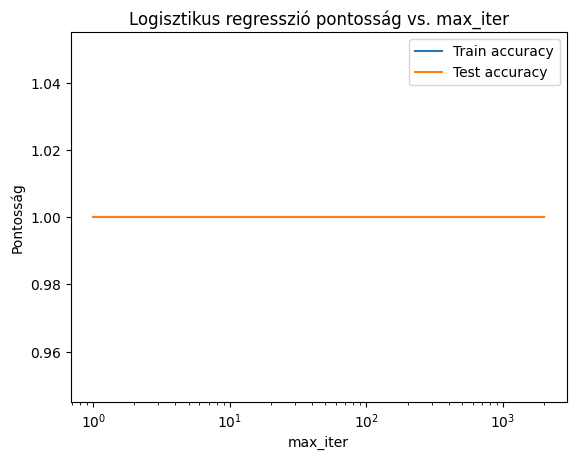

In [ ]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

iterations_part1 = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
train_accuracies_lr_part1 = []
test_accuracies_lr_part1 = []
for n_iter in iterations_part1:
    lr_iter_part1 = LogisticRegression(random_state=3650653441, max_iter=n_iter)
    lr_iter_part1.fit(X_train_scaled_part1, y_train_part1)
    train_accuracies_lr_part1.append(lr_iter_part1.score(X_train_scaled_part1, y_train_part1))
    test_accuracies_lr_part1.append(lr_iter_part1.score(X_test_scaled_part1, y_test_part1))
plt.plot(iterations_part1, train_accuracies_lr_part1, label="Train accuracy")
plt.plot(iterations_part1, test_accuracies_lr_part1, label="Test accuracy")
plt.xlabel("max_iter")
plt.ylabel("Pontosság")
plt.legend()
plt.xscale("log")
plt.title("Logisztikus regresszió pontosság vs. max_iter")
plt.show()

## 1.8 Döntési Határok Vizualizációja

Kirajzoljuk a modellek döntési határait a 2D PCA-val redukált adatokon (`contourf`).

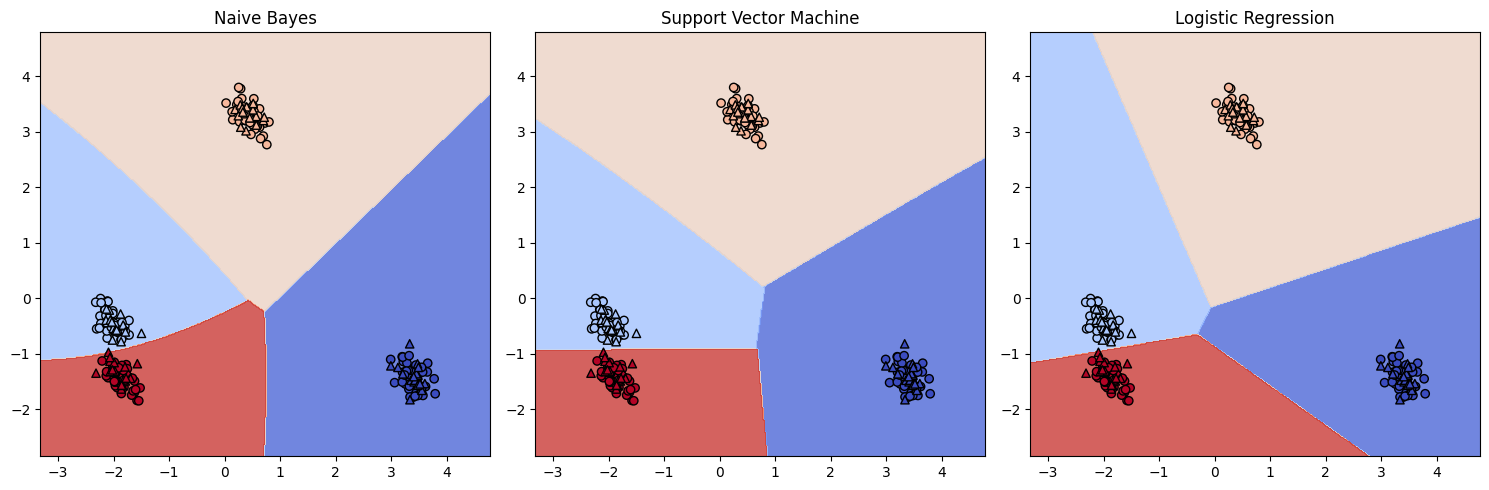

In [38]:
X_train_pca_part1, X_test_pca_part1, y_train_pca_part1, y_test_pca_part1 = train_test_split(
    X_pca_part1, y_part1, test_size=0.3, random_state=3650653441, stratify=y_part1
)
models_pca_part1 = {
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(random_state=3650653441, probability=True),
    "Logistic Regression": LogisticRegression(random_state=3650653441, max_iter=1000)
}
xx, yy = np.meshgrid(
    np.arange(X_pca_part1[:, 0].min() - 1, X_pca_part1[:, 0].max() + 1, 0.02),
    np.arange(X_pca_part1[:, 1].min() - 1, X_pca_part1[:, 1].max() + 1, 0.02)
)
fig, axes = plt.subplots(1, len(models_pca_part1), figsize=(15, 5))
for idx, (name, model_pca) in enumerate(models_pca_part1.items()):
    model_pca.fit(X_train_pca_part1, y_train_pca_part1)
    Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax = axes[idx]
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    ax.scatter(X_train_pca_part1[:, 0], X_train_pca_part1[:, 1], c=y_train_pca_part1, edgecolor="k", cmap=plt.cm.coolwarm)
    ax.scatter(X_test_pca_part1[:, 0], X_test_pca_part1[:, 1], c=y_test_pca_part1, edgecolor="k", marker="^", cmap=plt.cm.coolwarm)
    ax.set_title(name)
plt.tight_layout()
plt.show()

# 2. Feladat: Osztályozás a Wine Adathalmazon

## 2.1 Adat Betöltése

Betöltjük a Wine adathalmazt URL-ről `pandas.read_csv` segítségével.

In [39]:
url_part2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names_part2 = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
                      'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                      'Proanthocyanins', 'Color intensity', 'Hue',
                      'OD280/OD315 of diluted wines', 'Proline']
df_part2 = pd.read_csv(url_part2, header=None, names=column_names_part2)
print("Wine adathalmaz betöltve.")
print(f"Adathalmaz mérete: {df_part2.shape}")
print(df_part2.head())

Wine adathalmaz betöltve.
Adathalmaz mérete: (178, 14)
   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04             

## 2.2 Adat Vizualizációja (PCA)

PCA-t alkalmazunk a Wine adathalmaz jellemzőire is a 2D vizualizációhoz (`StandardScaler`, `PCA`, `plt.scatter`).

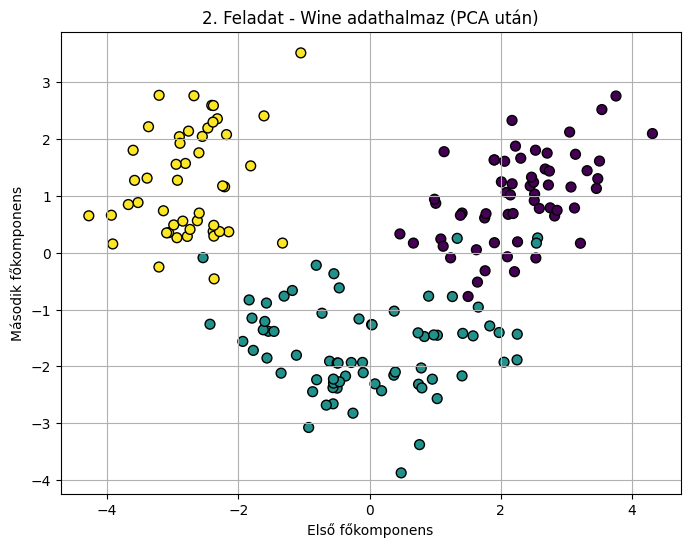

In [40]:
X_viz_part2 = df_part2.drop('Class', axis=1)
y_viz_part2 = df_part2['Class']
scaler_pca_part2 = StandardScaler()
X_viz_scaled_part2 = scaler_pca_part2.fit_transform(X_viz_part2)
pca_part2 = PCA(n_components=2, random_state=42)
X_pca_part2 = pca_part2.fit_transform(X_viz_scaled_part2)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_part2[:, 0], X_pca_part2[:, 1], c=y_viz_part2, cmap="viridis", edgecolor="k", s=50)
plt.title('2. Feladat - Wine adathalmaz (PCA után)')
plt.xlabel("Első főkomponens")
plt.ylabel("Második főkomponens")
plt.grid(True)
plt.show()

## 2.3 Adat Felosztása és Skálázása

Felosztjuk a Wine adatokat tanító és teszt halmazra (`train_test_split`), majd skálázzuk (`StandardScaler`).

In [41]:
X_part2 = df_part2.drop('Class', axis=1)
y_part2 = df_part2['Class']
X_train_part2, X_test_part2, y_train_part2, y_test_part2 = train_test_split(
    X_part2, y_part2, test_size=0.3, random_state=42, stratify=y_part2
)
scaler_model_part2 = StandardScaler()
X_train_scaled_part2 = scaler_model_part2.fit_transform(X_train_part2)
X_test_scaled_part2 = scaler_model_part2.transform(X_test_part2)

## 2.4 Modellek Tanítása és Kiértékelése

Tanítjuk és kiértékeljük a modelleket (NB, SVM, LogReg, k-NN) a Wine adathalmazon.


Naive Bayes - Teszt pontosság: 1.000
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



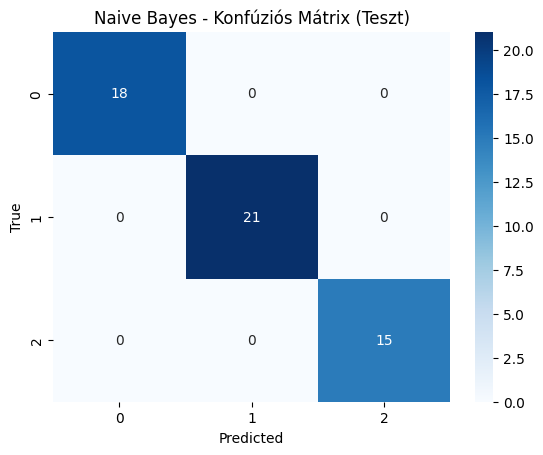


Support Vector Machine - Teszt pontosság: 0.981
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       0.95      1.00      0.98        21
           3       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



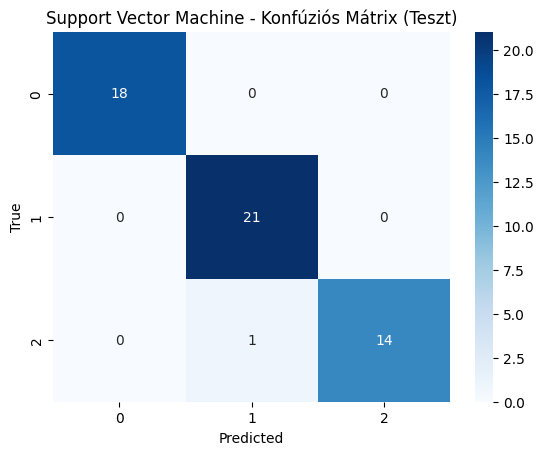


Logistic Regression - Teszt pontosság: 0.981
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



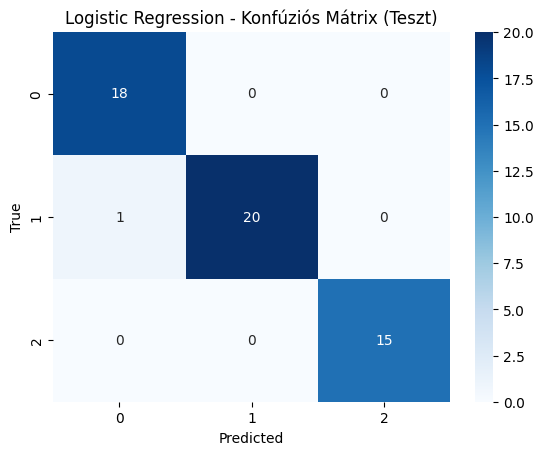


k-Nearest Neighbors - Teszt pontosság: 0.944
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      0.86      0.92        21
           3       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



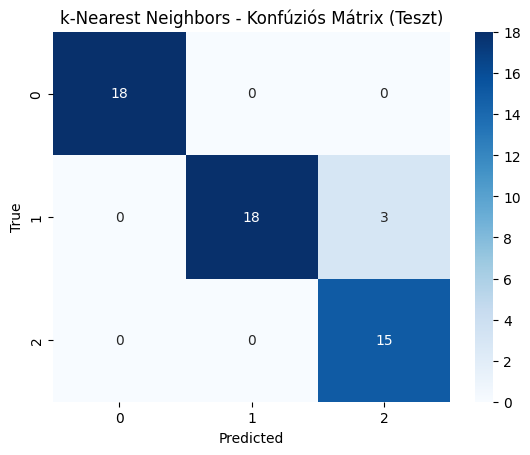

In [42]:
models_part2 = {
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(random_state=42, probability=True),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=10000),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}
results_part2 = {}
for name, model in models_part2.items():
    model.fit(X_train_scaled_part2, y_train_part2)
    y_pred_train_part2 = model.predict(X_train_scaled_part2)
    y_pred_test_part2 = model.predict(X_test_scaled_part2)
    accuracy_train_part2 = accuracy_score(y_train_part2, y_pred_train_part2)
    accuracy_test_part2 = accuracy_score(y_test_part2, y_pred_test_part2)
    report_test_part2 = classification_report(y_test_part2, y_pred_test_part2)
    cm_test_part2 = confusion_matrix(y_test_part2, y_pred_test_part2)
    results_part2[name] = {
        "train_acc": accuracy_train_part2,
        "test_acc": accuracy_test_part2,
        "report": report_test_part2,
        "confusion_matrix": cm_test_part2
    }
    print(f"\n{name} - Teszt pontosság: {accuracy_test_part2:.3f}")
    print(report_test_part2)
    sns.heatmap(cm_test_part2, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Konfúziós Mátrix (Teszt)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

## 2.5 Eredmények Összefoglalása

Összefoglaljuk a Wine adathalmazon elért eredményeket szövegesen.

In [43]:
print("\n--- 2. Feladat: Összehasonlítás ---")
print(f"{'Modell':<25} {'Train acc':<12} {'Test acc':<12}")
for name, res in results_part2.items():
    print(f"{name:<25} {res['train_acc']:<12.3f} {res['test_acc']:<12.3f}")


--- 2. Feladat: Összehasonlítás ---
Modell                    Train acc    Test acc    
Naive Bayes               0.968        1.000       
Support Vector Machine    1.000        0.981       
Logistic Regression       1.000        0.981       
k-Nearest Neighbors       0.984        0.944       


## 2.6 Logisztikus Regresszió Iterációk Hatása

Megvizsgáljuk a Logisztikus Regresszió konvergenciáját a Wine adathalmazon.

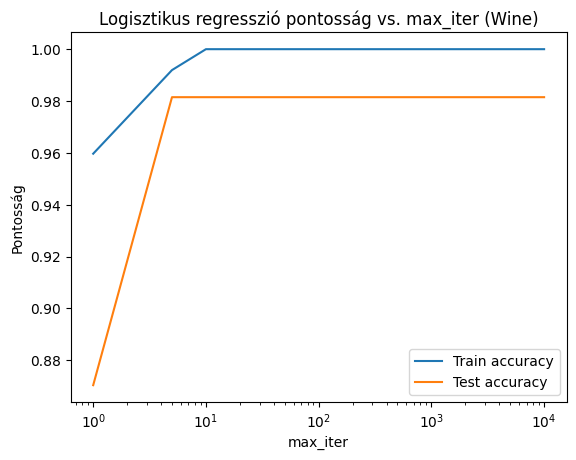

In [44]:
iterations_lr_part2 = [1, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
train_accuracies_lr_part2 = []
test_accuracies_lr_part2 = []
for n_iter in iterations_lr_part2:
    lr_iter_part2 = LogisticRegression(random_state=42, max_iter=n_iter)
    lr_iter_part2.fit(X_train_scaled_part2, y_train_part2)
    train_accuracies_lr_part2.append(lr_iter_part2.score(X_train_scaled_part2, y_train_part2))
    test_accuracies_lr_part2.append(lr_iter_part2.score(X_test_scaled_part2, y_test_part2))
plt.plot(iterations_lr_part2, train_accuracies_lr_part2, label="Train accuracy")
plt.plot(iterations_lr_part2, test_accuracies_lr_part2, label="Test accuracy")
plt.xlabel("max_iter")
plt.ylabel("Pontosság")
plt.legend()
plt.xscale("log")
plt.title("Logisztikus regresszió pontosság vs. max_iter (Wine)")
plt.show()

## 2.7 SVM Hiperparaméter-Hangolás ('C' és 'gamma')

`GridSearchCV` segítségével megkeressük az SVM modell optimális `C` és `gamma` paramétereit.

In [45]:
param_grid_svm_part2 = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf']
}
svm_cv_part2 = SVC(probability=True)
grid_search_svm_part2 = GridSearchCV(estimator=svm_cv_part2, param_grid=param_grid_svm_part2, cv=5, scoring='accuracy')
grid_search_svm_part2.fit(X_train_scaled_part2, y_train_part2)
best_params = grid_search_svm_part2.best_params_
best_score = grid_search_svm_part2.best_score_
print(f"Legjobb paraméterek: {best_params}, Legjobb CV pontosság: {best_score:.4f}")
best_svm_part2 = grid_search_svm_part2.best_estimator_
accuracy_svm_best_test_part2 = best_svm_part2.score(X_test_scaled_part2, y_test_part2)
print(f"Legjobb SVM teszt pontosság: {accuracy_svm_best_test_part2:.4f}")

Legjobb paraméterek: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}, Legjobb CV pontosság: 0.9920
Legjobb SVM teszt pontosság: 0.9815


## 2.8 SVM Hangolás Vizualizációja (Heatmap)

Heatmap segítségével ábrázoljuk (`seaborn.heatmap`), hogyan változott az SVM keresztvalidációs pontossága a `C` és `gamma` paraméterekre.

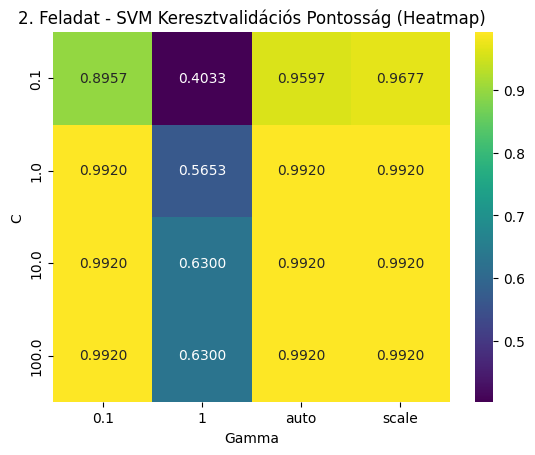

In [46]:
results_df_part2 = pd.DataFrame(grid_search_svm_part2.cv_results_)
results_df_part2 = results_df_part2[['param_C', 'param_gamma', 'mean_test_score']]
scores_part2 = results_df_part2.pivot(index='param_C', columns='param_gamma', values='mean_test_score')
sns.heatmap(scores_part2, annot=True, fmt=".4f", cmap="viridis")
plt.title('2. Feladat - SVM Keresztvalidációs Pontosság (Heatmap)')
plt.xlabel("Gamma")
plt.ylabel("C")
plt.show()

## 2.9 Döntési Határok Vizualizációja

Kirajzoljuk a modellek döntési határait a Wine adathalmaz PCA-val redukált változatán (`contourf`).

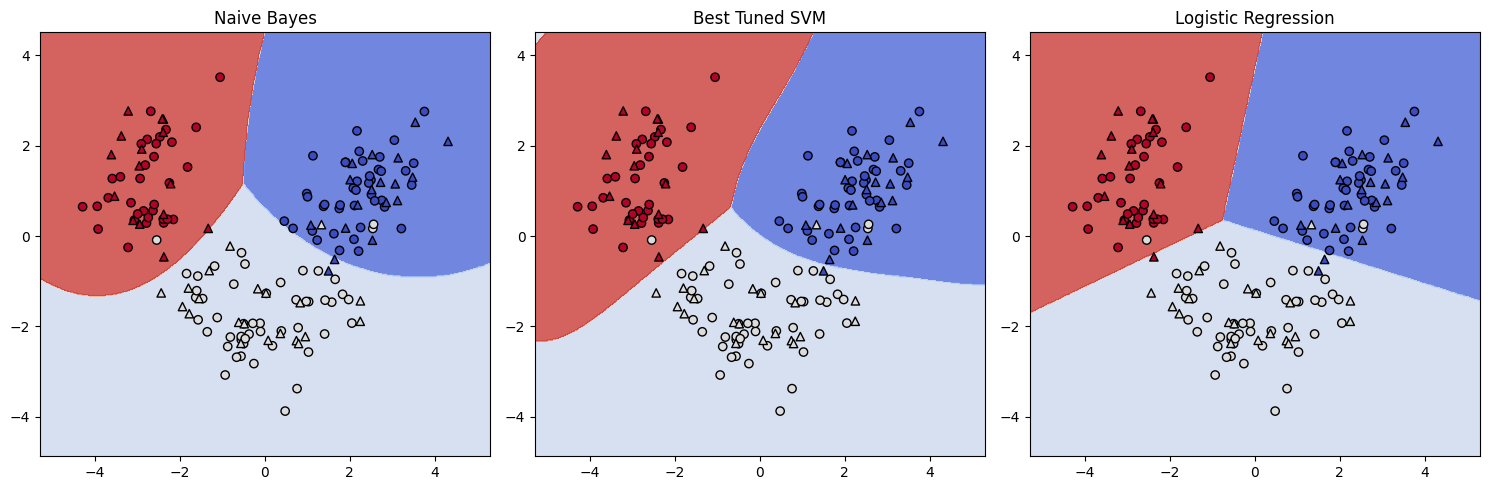

In [47]:
X_train_pca_part2, X_test_pca_part2, y_train_pca_part2, y_test_pca_part2 = train_test_split(
    X_pca_part2, y_part2, test_size=0.3, random_state=42, stratify=y_part2
)
models_pca_part2 = {
    "Naive Bayes": GaussianNB(),
    "Best Tuned SVM": best_svm_part2,
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=10000)
}
xx_part2, yy_part2 = np.meshgrid(
    np.arange(X_pca_part2[:, 0].min() - 1, X_pca_part2[:, 0].max() + 1, 0.02),
    np.arange(X_pca_part2[:, 1].min() - 1, X_pca_part2[:, 1].max() + 1, 0.02)
)
fig, axes = plt.subplots(1, len(models_pca_part2), figsize=(15, 5))
for idx, (name, model_pca) in enumerate(models_pca_part2.items()):
    model_pca.fit(X_train_pca_part2, y_train_pca_part2)
    Z_part2 = model_pca.predict(np.c_[xx_part2.ravel(), yy_part2.ravel()])
    Z_part2 = Z_part2.reshape(xx_part2.shape)
    ax = axes[idx]
    ax.contourf(xx_part2, yy_part2, Z_part2, alpha=0.8, cmap=plt.cm.coolwarm)
    ax.scatter(X_train_pca_part2[:, 0], X_train_pca_part2[:, 1], c=y_train_pca_part2, edgecolor="k", cmap=plt.cm.coolwarm)
    ax.scatter(X_test_pca_part2[:, 0], X_test_pca_part2[:, 1], c=y_test_pca_part2, edgecolor="k", marker="^", cmap=plt.cm.coolwarm)
    ax.set_title(name)
plt.tight_layout()
plt.show()